In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import word_tokenize   # module for tokenizing strings
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
DATA_DIR = "../input/feedback-prize-english-language-learning/"
os.listdir(DATA_DIR)

['sample_submission.csv', 'train.csv', 'test.csv']

In [3]:
train_data = pd.read_csv(DATA_DIR+'train.csv')
train_data.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [4]:
test_data = pd.read_csv(DATA_DIR+'test.csv')
test_data.head()

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


# Split into train and validation sets
- To validate our models and hypothesis before we can test

In [5]:

train_df, test_df = train_test_split(
    train_data, train_size=0.8, random_state=42)

# EDA 
We want to understand the scores of each metric in the evaluation criteria.

## Visualize vocab score for the essays

In [6]:
vocab_subset = train_df[['full_text', 'vocabulary']]
vocab_subset.shape

(3128, 2)

In [9]:
def remove_punctuation(text):
    return "".join(["" if ch in string.punctuation else ch.lower() for ch in text])
stopwords_english = set(stopwords.words('english'))
def clean_words(headline):
    return [
    word for word in headline
    if word not in stopwords_english
]  
stemmer = PorterStemmer()
def words_stems(headline):
    return [
    stemmer.stem(word) for word in headline
]
def tokenize_text(text):
    return word_tokenize(text)
def remove_numbers(text):
    return re.sub("[^a-zA-Z]", " ", text)

In [10]:
vocab_subset['full_text'] = vocab_subset['full_text'].apply(remove_punctuation).apply(remove_numbers).apply(tokenize_text).apply(clean_words)
vocab_subset.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,full_text,vocabulary
247,"[wouldnt, want, time, homework, school, wouldn...",3.0
1360,"[debate, opportunity, offered, schools, studen...",3.5
3318,"[negative, take, information, books, play, gam...",2.5
2337,"[think, better, talk, people, one, person, bec...",3.0
3631,"[reasons, churchills, statement, agree, many, ...",2.5


build a 3 corpus of score greater than 3.5 and less and score greater than 4. Visualize the vocab and try to see if there are some differences

In [13]:
# corpus_cutoff = set()
# corpus_perfect = set()
# corpus_low = set()
# for i, row in tqdm(vocab_subset.iterrows()):
#     if row['vocabulary'] >= 3.5:
#         for word in row['full_text']:
#             corpus_cutoff.add(word)

3128it [00:00, 12617.06it/s]


In [14]:
# for i, row in tqdm(vocab_subset.iterrows()):
#     if row['vocabulary'] < 3.5:
#         for word in row['full_text']:
#             corpus_low.add(word)

3128it [00:00, 12490.99it/s]


In [15]:
# for i, row in tqdm(vocab_subset.iterrows()):
#     if row['vocabulary'] > 4.0:
#         for word in row['full_text']:
#             corpus_perfect.add(word)

3128it [00:00, 18160.10it/s]


In [21]:
df_words = pd.DataFrame(zip(list(corpus_low), list(corpus_cutoff), list(corpus_perfect)), columns=['low', 'cutoff', 'high'])
df_words.head()

,low,cutoff,high
0,relates,relates,sort
1,quick,completing,consists
2,completing,quick,completing
3,unthinkable,unthinkable,tomorrow
4,paragraf,advertisements,advertisements


In [23]:
#df_words.to_csv('vocab.csv')

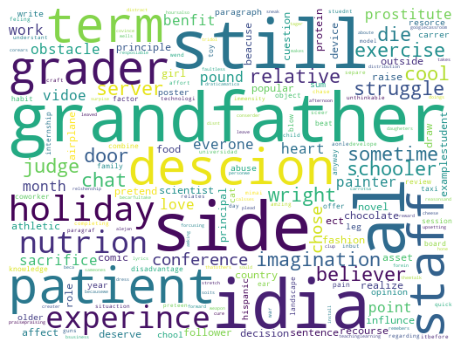

In [35]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(df_words['low']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

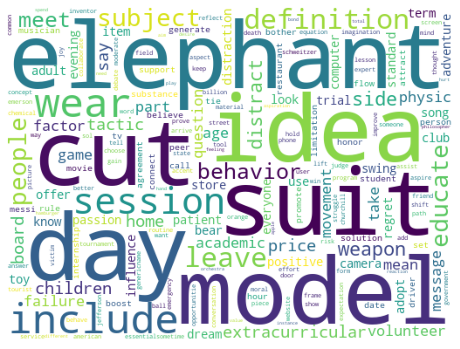

In [36]:
plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 512,
                    height = 384
                        ).generate(' '.join(df_words['high']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()